# Support Vector Machine Regression

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVR, SVR
import matplotlib.patches as patches

In [5]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "svm"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## SVM Regression

In [27]:
np.random.seed(42)
X = 2 * np.random.rand(50,1)
y = 4 + 3 * X[:,0] + np.random.randn(50)

svm_reg =  make_pipeline(StandardScaler(),
                        LinearSVR(epsilon = 0.5, dual = True, random_state = 42))

svm_reg.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(epsilon=0.5, random_state=42))])

In [28]:
def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    epsilon = svm_reg[-1].epsilon
    off_margin = np.abs(y - y_pred) >= epsilon
    return np.argwhere(off_margin)

In [84]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    epsilon = svm_reg[-1].epsilon
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$", zorder=-2)
    plt.plot(x1s, y_pred + epsilon, "k--", zorder=-2)
    plt.plot(x1s, y_pred - epsilon, "k--", zorder=-2)
    plt.scatter(X[svm_reg._support], y[svm_reg._support], s=180,
                facecolors='#AAA', zorder=-1)
    plt.plot(X, y, "bo")
    plt.xlabel("$x_1$")
    plt.legend(loc="upper left")
    plt.axis(axes)

In [41]:
svm_reg2 = make_pipeline(StandardScaler(),
                       LinearSVR(epsilon= 1.2, dual = True, random_state = 42))

In [42]:
svm_reg2.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(epsilon=1.2, random_state=42))])

In [43]:
svm_reg._support = find_support_vectors(svm_reg, X, y)
svm_reg2._support = find_support_vectors(svm_reg2, X, y)

In [44]:
eps_x1 = 1
eps_y_pred = svm_reg2.predict([[eps_x1]])

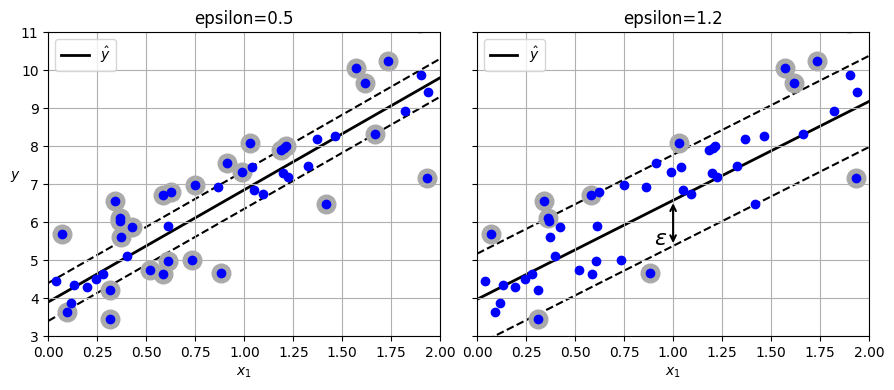

In [72]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg, X, y, [0, 2, 3, 11])
plt.title(f"epsilon={svm_reg[-1].epsilon}")
plt.ylabel("$y$", rotation=0)
plt.grid()
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(f"epsilon={svm_reg2[-1].epsilon}")
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg2[-1].epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.90, 5.4, r"$\epsilon$", fontsize=16)
plt.grid()
save_fig("svm_regression_plot")
plt.show()

In [76]:
np.random.seed(42)
X = 2 *np.random.rand(50,1) - 1
y = 0.2 + 0.1 * X[:, 0] + 0.5 *  X[:, 0] ** 2 + np.random.randn(50) / 10

svm_poly_reg =  make_pipeline(StandardScaler(),
                             SVR(kernel = "poly", degree=2, C = 0.01, epsilon = 0.1))
svm_poly_reg.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=0.01, degree=2, kernel='poly'))])

In [82]:
svm_poly_reg2 = make_pipeline(StandardScaler(),
                            SVR(kernel = "poly", degree = 2, C =100))
svm_poly_reg2.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=100, degree=2, kernel='poly'))])

In [87]:
svm_poly_reg._support = find_support_vectors(svm_poly_reg, X, y)
svm_poly_reg2._support = find_support_vectors(svm_poly_reg2, X, y)

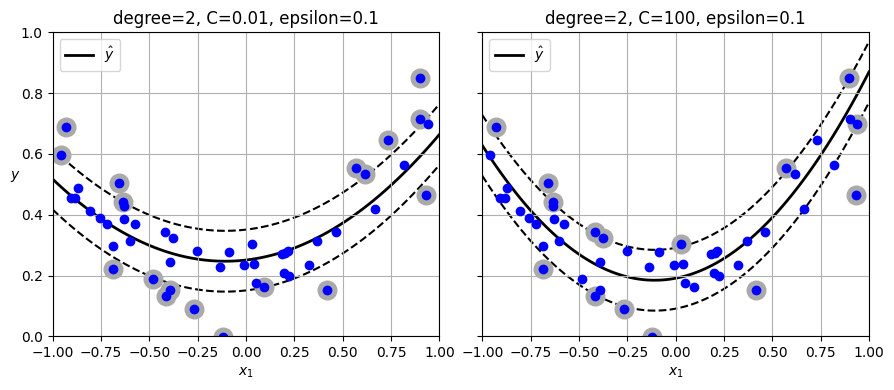

In [89]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg, X, y, [-1, 1, 0, 1])
plt.title(f"degree={svm_poly_reg[-1].degree}, "
          f"C={svm_poly_reg[-1].C}, "
          f"epsilon={svm_poly_reg[-1].epsilon}")
plt.ylabel("$y$", rotation=0)
plt.grid()

plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(f"degree={svm_poly_reg2[-1].degree}, "
          f"C={svm_poly_reg2[-1].C}, "
          f"epsilon={svm_poly_reg2[-1].epsilon}")
plt.grid()
save_fig("svm_with_polynomial_kernel_plot")

## Under The Hood

In [97]:
def plot_2D_decision_function(w, b, ylabel = True, x1_lim=[-3, 3]):
    x1 = np.linspace(x1_lim[0], x1_lim[1],  200)
    y = w* x1 +b
    half_margin = 1 / w

    plt.plot(x1, y, "b-", linewidth =2, label = r"$s = w_1 x_1 $")
    plt.axhline(y =0, color ='k', linewidth = 1)
    plt.axvline(x = 0, color = 'k', linewidth = 1)
    rect = patches.Rectangle((-half_margin, -2), 2 * half_margin, 4,
                            edgecolor = 'none', facecolor = 'gray',alpha = 0.2)
    plt.gca().add_patch(rect)
    plt.plot([-3, 3], [1, 1], "k--", linewidth = 1)
    plt.plot([-3, 3], [-1, -1], "k--", linewidth = 1)
    plt.plot(half_margin, 1, "k.")
    plt.plot(-half_margin, -1, "k.")
    plt.axis(x1_lim + [-2, 2])
    plt.xlabel("$x_1$")
    if ylabel:
        plt.ylabel("$s$", rotation = 0, labelpad = 5)
        plt.legend()
        plt.text(1.02, -1.6, "Margin", ha = "left", va ="center", color="k")

    plt.annotate(
        '', xy=(-half_margin, -1.6), xytext = (half_margin, -1.6),
        arrowprops = {'ec': 'k', 'arrowstyle': '<->' , 'linewidth' : 1.5}
        
    )
    plt.title(f"$w_1 = {w}$")

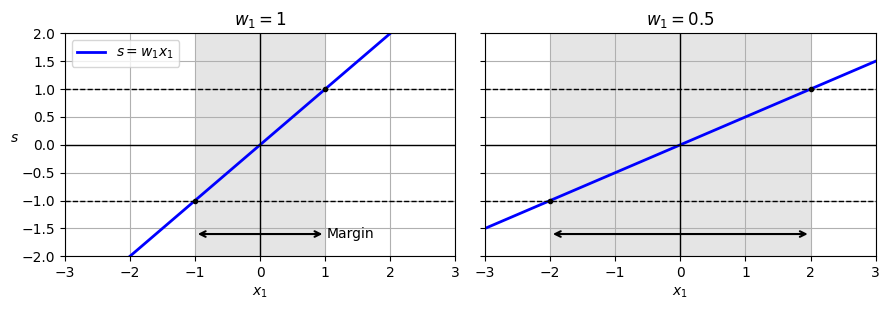

In [98]:
fig, axes = plt.subplots(ncols = 2, figsize = (9, 3.2), sharey = True)
plt.sca(axes[0])
plot_2D_decision_function(1, 0)
plt.grid()

plt.sca(axes[1])
plot_2D_decision_function(0.5, 0, ylabel = False)
plt.grid()
save_fig("small_w_large_margin_plot")

In [99]:
s = np.linspace(-2.5, 2.5, 200)
hinge_pos = np.where(1 - s < 0, 0, 1 - s)
hinge_neg = np.where(1 + s < 0, 0, 1 + s)

titles = (r"Hinge loss = $max(0, 1 - s\,t)$", "Squared Hinge loss")

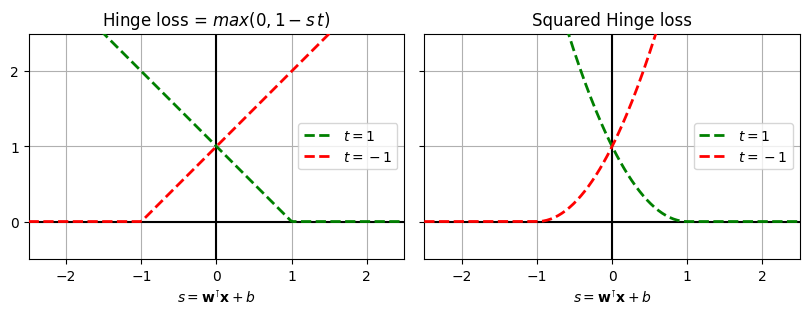

In [101]:
fig, axs = plt.subplots(1, 2, sharey = True, figsize = (8.2, 3))
for ax, loss_pos, loss_neg, title, in zip(
    axs, (hinge_pos, hinge_pos ** 2), (hinge_neg, hinge_neg ** 2), titles):

    ax.plot(s, loss_pos, 'g--', linewidth = 2, zorder = 10, label = "$t=1$")
    ax.plot(s, loss_neg, 'r--', linewidth = 2, zorder = 10, label= "$t = -1$")
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.set_xlabel(r"$s = \mathbf{w}^\intercal \mathbf{x} + b$")
    ax.axis([-2.5, 2.5, -0.5, 2.5])
    ax.legend(loc="center right")
    ax.set_title(title)
    ax.set_yticks(np.arange(0, 2.5, 1))
    ax.set_aspect("equal")

save_fig("hinge_plot")
    